<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Exercise-1" data-toc-modified-id="Exercise-1-1">Exercise 1</a></span></li><li><span><a href="#Exercise-2" data-toc-modified-id="Exercise-2-2">Exercise 2</a></span></li><li><span><a href="#Exercise-3" data-toc-modified-id="Exercise-3-3">Exercise 3</a></span></li><li><span><a href="#COVID-Cases-by-Month" data-toc-modified-id="COVID-Cases-by-Month-4">COVID Cases by Month</a></span></li></ul></div>

# Solution Practice Sheet 3

##  Exercise 1 

In [1]:
import pandas as pd

In [2]:
df=pd.read_csv("results.csv")

In [3]:
df.head(4)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False


Adding a column win/lose/tie column: We first create a list of conditions 

In [4]:
x=df['home_score']-df['away_score']
conditions = [
    (x<0),
    (x>0),
    (x==0)
    ]

In [5]:
values= ['win','lose','draw']

In [6]:
import numpy as np

In [7]:
df['result'] = np.select(conditions, values)

In [8]:
df.head(3)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,result
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,draw
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,lose
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,lose


In [9]:
df['result'].value_counts()

lose    21009
win     12224
draw     9955
Name: result, dtype: int64

In [10]:
df['result'].value_counts(normalize=True)

lose    0.486455
win     0.283042
draw    0.230504
Name: result, dtype: float64

In [11]:
x=df['result'].value_counts()

In [12]:
x=np.array(x)

In [13]:
x

array([21009, 12224,  9955], dtype=int64)

In [14]:
N=x.sum()

In [15]:
N

43188

In [16]:
import statsmodels.api as sm
from statsmodels.stats.proportion import proportion_confint

In [17]:
CI_win=proportion_confint(count=x[1],nobs=N,alpha=(1-.95))

In [18]:
CI_win

(0.27879305599044235, 0.28729011526083115)

In [19]:
CI_lose=proportion_confint(count=x[0],nobs=N,alpha=(1-.95))

In [20]:
CI_lose

(0.481740705905987, 0.49116843552218753)

In [21]:
CI_draw=proportion_confint(count=x[2],nobs=N,alpha=(1-.95))

In [22]:
CI_draw

(0.2265318471530234, 0.23447584016752862)

In [23]:
df['country'].unique()

array(['Scotland', 'England', 'Wales', 'Ireland', 'United States',
       'Uruguay', 'Austria', 'Hungary', 'Argentina', 'Belgium', 'France',
       'Netherlands', 'Bohemia', 'Switzerland', 'Sweden', 'Germany',
       'Italy', 'Chile', 'Norway', 'Finland', 'Luxembourg', 'Russia',
       'Denmark', 'Spain', 'Japan', 'Brazil', 'Paraguay', 'China PR',
       'Canada', 'Estonia', 'Guatemala', 'Czechoslovakia', 'Poland',
       'Yugoslavia', 'New Zealand', 'Romania', 'Latvia', 'Portugal',
       'Northern Ireland', 'Australia', 'Lithuania', 'Turkey', 'Mexico',
       'Aruba', 'Soviet Union', 'Haiti', 'Philippines', 'Bulgaria',
       'Jamaica', 'Kenya', 'Czech Republic', 'Peru', 'Honduras',
       'British Guyana', 'Uganda', 'El Salvador', 'Barbados',
       'Irish Free State', 'Trinidad and Tobago', 'Greece', 'Curaçao',
       'Egypt', 'Dominica', 'Guadeloupe', 'Palestine',
       'Netherlands Guyana', 'French Guiana', 'Cuba', 'Colombia',
       'Saint Kitts and Nevis', 'Éire', 'Panama', 'B

In [24]:
dfegy=df[df['country']=='Egypt']

In [25]:
dfegy.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,result
1463,2/19/1932,Egypt,Hungary,0,0,Friendly,Cairo,Egypt,False,draw
1661,3/16/1934,Egypt,Israel,7,1,FIFA World Cup qualification,Cairo,Egypt,False,lose
1895,6/19/1936,Egypt,Greece,3,1,Friendly,Cairo,Egypt,False,lose
2927,12/24/1948,Egypt,Norway,1,1,Friendly,Cairo,Egypt,False,draw
3080,2/17/1950,Egypt,Greece,2,0,Friendly,Cairo,Egypt,False,lose


Create a variable type of the match  `friendly/No friendly` and `home/away` match

In [26]:
conditions = [
    (dfegy['tournament']=='Friendly'),
    (dfegy['tournament']!='Friendly')
    ]

In [27]:
values=['Friendly','Official']

In [28]:
dfegy['typematch'] = np.select(conditions, values)

C:\Users\dhafe\AppData\Local\Temp/ipykernel_27880/2597929672.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfegy['typematch'] = np.select(conditions, values)


In [29]:
dfegy['typematch'].value_counts()

Official    226
Friendly    181
Name: typematch, dtype: int64

Comparing the probability of win/lose/draw by type of match 

In [30]:
x=pd.crosstab(dfegy['typematch'],dfegy['result'],margins=True)
x

result,draw,lose,win,All
typematch,,,,
Friendly,37,99,45,181
Official,40,139,47,226
All,77,238,92,407


In [31]:
x=np.array(x)
x

array([[ 37,  99,  45, 181],
       [ 40, 139,  47, 226],
       [ 77, 238,  92, 407]], dtype=int64)

In [32]:
CI_egywin_friendly=proportion_confint(count=x[0,2],nobs=x[0,3],alpha=(1-.95))
CI_egywin_friendly
                                                          

(0.1856528084886489, 0.3115847605721246)

In [33]:
CI_egywin_official=proportion_confint(count=x[1,2],nobs=x[1,3],alpha=(1-.95))
CI_egywin_official

(0.1550517855722795, 0.2608774179675435)

Plotting the Confidence intervals 

In [34]:
ci_egywin = {}
ci_egywin['Typematch'] = ['Friendly','Official']
ci_egywin['lb'] = [CI_egywin_friendly[0],CI_egywin_official[0]]
ci_egywin['ub'] = [CI_egywin_friendly[1],CI_egywin_official[1]]
df_ci= pd.DataFrame(ci_egywin)
df_ci

,Typematch,lb,ub
0,Friendly,0.185653,0.311585
1,Official,0.155052,0.260877


([<matplotlib.axis.YTick at 0x1c1ef702310>,
 [Text(0, 0, 'Friendly'), Text(0, 1, 'Official')])

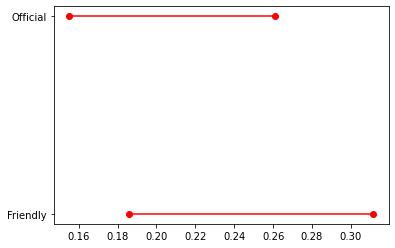

In [35]:
import matplotlib.pyplot as plt
for lb,ub,y in zip(df_ci['lb'],df_ci['ub'],range(len(df_ci))):
    plt.plot((lb,ub),(y,y),'ro-')
plt.yticks(range(len(df_ci)),list(df_ci['Typematch']))

Let's now check out the impact of fans on the match results. We will compare the probability of winning between home matches and away matches.

In [36]:
dfegy['home']=(dfegy['home_team']=='Egypt')

C:\Users\dhafe\AppData\Local\Temp/ipykernel_27880/2175071764.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfegy['home']=(dfegy['home_team']=='Egypt')


In [37]:
dfegy['home'].value_counts()

True     258
False    149
Name: home, dtype: int64

In [38]:
x=pd.crosstab(dfegy['home'],dfegy['result'],margins=True)
x

result,draw,lose,win,All
home,,,,
False,33,67,49,149
True,44,171,43,258
All,77,238,92,407


In [39]:
dfegy.head(4)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,result,typematch,home
1463,2/19/1932,Egypt,Hungary,0,0,Friendly,Cairo,Egypt,False,draw,Friendly,True
1661,3/16/1934,Egypt,Israel,7,1,FIFA World Cup qualification,Cairo,Egypt,False,lose,Official,True
1895,6/19/1936,Egypt,Greece,3,1,Friendly,Cairo,Egypt,False,lose,Friendly,True
2927,12/24/1948,Egypt,Norway,1,1,Friendly,Cairo,Egypt,False,draw,Friendly,True


In [40]:
x=np.array(x)
x

array([[ 33,  67,  49, 149],
       [ 44, 171,  43, 258],
       [ 77, 238,  92, 407]], dtype=int64)

In [41]:
CI_egywin_home=proportion_confint(count=x[1,2],nobs=x[1,3],alpha=(1-.95))
CI_egywin_home

(0.12119174183927744, 0.21214159149405587)

In [42]:
CI_egywin_away=proportion_confint(count=x[0,2],nobs=x[0,3],alpha=(1-.95))
CI_egywin_away

(0.25342513144684364, 0.40429298935852553)

In [43]:
ci_egywin = {}
ci_egywin['home'] = ['Yes','No']
ci_egywin['lb'] = [CI_egywin_home[0],CI_egywin_away[0]]
ci_egywin['ub'] = [CI_egywin_home[1],CI_egywin_away[1]]
df_ci= pd.DataFrame(ci_egywin)
df_ci

,home,lb,ub
0,Yes,0.121192,0.212142
1,No,0.253425,0.404293


([<matplotlib.axis.YTick at 0x1c1efeba550>,
 [Text(0, 0, 'Yes'), Text(0, 1, 'No')])

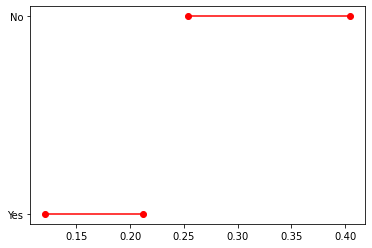

In [44]:
for lb,ub,y in zip(df_ci['lb'],df_ci['ub'],range(len(df_ci))):
    plt.plot((lb,ub),(y,y),'ro-')
plt.yticks(range(len(df_ci)),list(df_ci['home']))

## Exercise 2

In [45]:
import pandas as pd

In [46]:
df=pd.read_csv('covid_data.csv',encoding='latin-1')

In [47]:
df.head()

,date,iso3c,country,income,region,continent,dcases,ddeaths,population,weekdays,month
0,2020-02-24,AFG,Afghanistan,Low income,South Asia,Asia,5,0,38041754,Mon,Feb
1,2020-02-25,AFG,Afghanistan,Low income,South Asia,Asia,0,0,38041754,Tue,Feb
2,2020-02-26,AFG,Afghanistan,Low income,South Asia,Asia,0,0,38041754,Wed,Feb
3,2020-02-27,AFG,Afghanistan,Low income,South Asia,Asia,0,0,38041754,Thu,Feb
4,2020-02-28,AFG,Afghanistan,Low income,South Asia,Asia,0,0,38041754,Fri,Feb


In [48]:
df['country'].unique()

array(['Afghanistan', 'Angola', 'Albania', 'Andorra',
       'United Arab Emirates', 'Argentina', 'Armenia',
       'Antigua & Barbuda', 'Australia', 'Austria', 'Azerbaijan',
       'Burundi', 'Belgium', 'Benin', 'Burkina Faso', 'Bangladesh',
       'Bulgaria', 'Bahrain', 'Bahamas', 'Bosnia & Herzegovina',
       'Belarus', 'Belize', 'Bolivia', 'Brazil', 'Barbados', 'Brunei',
       'Bhutan', 'Botswana', 'Central African Republic', 'Canada',
       'Switzerland', 'Chile', 'China', 'Côte d\x92Ivoire', 'Cameroon',
       'Congo - Kinshasa', 'Congo - Brazzaville', 'Colombia', 'Comoros',
       'Cape Verde', 'Costa Rica', 'Cuba', 'Cyprus', 'Czechia', 'Germany',
       'Djibouti', 'Dominica', 'Denmark', 'Dominican Republic', 'Algeria',
       'Ecuador', 'Egypt', 'Spain', 'Estonia', 'Ethiopia', 'Finland',
       'Fiji', 'France', 'Gabon', 'United Kingdom', 'Georgia', 'Ghana',
       'Guinea', 'Gambia', 'Guinea-Bissau', 'Equatorial Guinea', 'Greece',
       'Grenada', 'Guatemala', 'Guyana', '

In [49]:
from pandas.api.types import CategoricalDtype
cats=['Fri', 'Sat', 'Sun','Mon','Tue','Wed','Thu']
cat_type = CategoricalDtype(categories=cats, ordered=True)
df['weekdays'] = df['weekdays'].astype(cat_type)

In [50]:
from pandas.api.types import CategoricalDtype
cats=['Jan', 'Feb', 'Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
cat_type = CategoricalDtype(categories=cats, ordered=True)
df['month'] = df['month'].astype(cat_type)

In [51]:
import numpy as np

In [52]:
dfegy=df[df['country']=='Egypt']

In [53]:
stats=dfegy.groupby("weekdays").agg({"dcases": [np.mean, np.std, np.size]})

In [54]:
stats

dcases                 
                mean         std size
weekdays                             
Fri       567.161616  428.533849   99
Sat       558.806122  421.803605   98
Sun       545.520408  422.358748   98
Mon       561.846939  442.137949   98
Tue       566.153061  419.125460   98
Wed       561.479592  406.337812   98
Thu       567.683673  410.020004   98

In [55]:
statsm=dfegy.groupby("month").agg({"dcases": [np.mean, np.std, np.size]})
statsm

dcases                 
              mean         std size
month                              
Jan     899.645161  251.335970   31
Feb     374.409091  288.087868   44
Mar     329.290323  310.292849   62
Apr     504.133333  354.246465   60
May     879.774194  346.475245   62
Jun    1032.633333  454.674216   60
Jul     463.661290  437.595552   62
Aug     145.806452   60.683224   62
Sep     339.033333  225.855584   60
Oct     497.580645  362.321547   62
Nov     598.616667  370.082496   60
Dec     792.709677  300.346870   62

In [56]:
import numpy as np
import scipy.stats 

In [57]:
statsm.index

CategoricalIndex(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug',
                  'Sep', 'Oct', 'Nov', 'Dec'],
                 categories=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', ...], ordered=True, dtype='category', name='month')

In [58]:
ci95_hi = []
ci95_lo = []

In [59]:
for i in statsm.index:
    m, s, n = statsm.loc[i]
    x=scipy.stats.t.interval(.95, n-1, m,s/np.sqrt(n-1))
    ci95_hi.append(x[1])
    ci95_lo.append(x[0])

In [60]:
ci95_hi

[993.3598571863843,
 463.0084047471138,
 408.7332244407111,
 596.4171621669087,
 968.4807139392825,
 1151.0793353591891,
 575.6969386179874,
 161.3429084204986,
 397.87038622259695,
 590.3442237843955,
 695.0258988600798,
 869.6061543814164]

In [61]:
ci95_lo

[805.9304653942609,
 285.8097770710681,
 249.84742072057924,
 411.8495044997579,
 791.0676731574916,
 914.1873313074777,
 351.6256420271739,
 130.26999480530787,
 280.19628044406977,
 404.8170665381852,
 502.2074344732536,
 715.8132004572933]

In [62]:
statsm['ci95_hi'] = ci95_hi
statsm['ci95_lo'] = ci95_lo
print(statsm)

            dcases                       ci95_hi     ci95_lo
              mean         std size                         
month                                                       
Jan     899.645161  251.335970   31   993.359857  805.930465
Feb     374.409091  288.087868   44   463.008405  285.809777
Mar     329.290323  310.292849   62   408.733224  249.847421
Apr     504.133333  354.246465   60   596.417162  411.849504
May     879.774194  346.475245   62   968.480714  791.067673
Jun    1032.633333  454.674216   60  1151.079335  914.187331
Jul     463.661290  437.595552   62   575.696939  351.625642
Aug     145.806452   60.683224   62   161.342908  130.269995
Sep     339.033333  225.855584   60   397.870386  280.196280
Oct     497.580645  362.321547   62   590.344224  404.817067
Nov     598.616667  370.082496   60   695.025899  502.207434
Dec     792.709677  300.346870   62   869.606154  715.813200


In [63]:
df_ci= pd.DataFrame(statsm)

In [64]:
df_ci

dcases                       ci95_hi     ci95_lo
              mean         std size                         
month                                                       
Jan     899.645161  251.335970   31   993.359857  805.930465
Feb     374.409091  288.087868   44   463.008405  285.809777
Mar     329.290323  310.292849   62   408.733224  249.847421
Apr     504.133333  354.246465   60   596.417162  411.849504
May     879.774194  346.475245   62   968.480714  791.067673
Jun    1032.633333  454.674216   60  1151.079335  914.187331
Jul     463.661290  437.595552   62   575.696939  351.625642
Aug     145.806452   60.683224   62   161.342908  130.269995
Sep     339.033333  225.855584   60   397.870386  280.196280
Oct     497.580645  362.321547   62   590.344224  404.817067
Nov     598.616667  370.082496   60   695.025899  502.207434
Dec     792.709677  300.346870   62   869.606154  715.813200

In [65]:
df_ci.index

CategoricalIndex(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug',
                  'Sep', 'Oct', 'Nov', 'Dec'],
                 categories=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', ...], ordered=True, dtype='category', name='month')

In [66]:
df_ci['month']=df_ci.index

In [67]:
df_ci

dcases                       ci95_hi     ci95_lo month
              mean         std size                               
month                                                             
Jan     899.645161  251.335970   31   993.359857  805.930465   Jan
Feb     374.409091  288.087868   44   463.008405  285.809777   Feb
Mar     329.290323  310.292849   62   408.733224  249.847421   Mar
Apr     504.133333  354.246465   60   596.417162  411.849504   Apr
May     879.774194  346.475245   62   968.480714  791.067673   May
Jun    1032.633333  454.674216   60  1151.079335  914.187331   Jun
Jul     463.661290  437.595552   62   575.696939  351.625642   Jul
Aug     145.806452   60.683224   62   161.342908  130.269995   Aug
Sep     339.033333  225.855584   60   397.870386  280.196280   Sep
Oct     497.580645  362.321547   62   590.344224  404.817067   Oct
Nov     598.616667  370.082496   60   695.025899  502.207434   Nov
Dec     792.709677  300.346870   62   869.606154  715.813200   Dec

In [68]:
df_ci.columns

MultiIndex([( 'dcases', 'mean'),
            ( 'dcases',  'std'),
            ( 'dcases', 'size'),
            ('ci95_hi',     ''),
            ('ci95_lo',     ''),
            (  'month',     '')],
           )

In [69]:
import matplotlib.pyplot as plt

([<matplotlib.axis.YTick at 0x1c1ee9e1dc0>,
 [Text(0, 0, 'Jan'),
  Text(0, 1, 'Feb'),
  Text(0, 2, 'Mar'),
  Text(0, 3, 'Apr'),
  Text(0, 4, 'May'),
  Text(0, 5, 'Jun'),
  Text(0, 6, 'Jul'),
  Text(0, 7, 'Aug'),
  Text(0, 8, 'Sep'),
  Text(0, 9, 'Oct'),
  Text(0, 10, 'Nov'),
  Text(0, 11, 'Dec')])

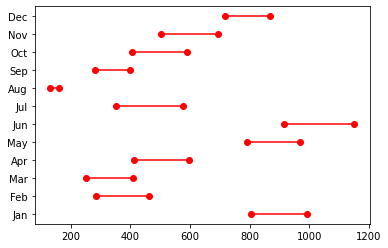

In [70]:
for lb,ub,y in zip(df_ci['ci95_lo'],df_ci['ci95_hi'],range(len(df_ci))):
    plt.plot((lb,ub),(y,y),'ro-')
plt.yticks(range(len(df_ci)),list(df_ci['month']))


## Exercise 3

In [71]:
import numpy as np
from scipy.stats import norm,t
import pandas as pd

In [72]:
yM, sM, nM = 4.5,0.45,55

In [73]:
yF, sF, nF = 3.1,0.33,65

In [74]:
ciM=scipy.stats.t.interval(.95, nM-1, yM,np.sqrt(sM)/np.sqrt(nM-1))

In [75]:
ciM

(4.316980398278775, 4.683019601721225)

In [76]:
ciF=scipy.stats.t.interval(.95, nF-1, yF,np.sqrt(sF)/np.sqrt(nF-1))

In [77]:
ciF

(2.956548960673736, 3.2434510393262643)

In [78]:
ci = {}
ci['Gender'] = ['Male','Female']
ci['lb'] = [ciM[0],ciF[0]]
ci['ub'] = [ciM[1],ciF[1]]
df_ci= pd.DataFrame(ci)

([<matplotlib.axis.YTick at 0x1c1eea7eca0>,
 [Text(0, 0, 'Male'), Text(0, 1, 'Female')])

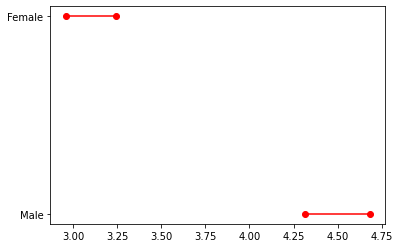

In [79]:
import matplotlib.pyplot as plt
for lb,ub,y in zip(df_ci['lb'],df_ci['ub'],range(len(df_ci))):
    plt.plot((lb,ub),(y,y),'ro-')
plt.yticks(range(len(df_ci)),list(df_ci['Gender']))

## COVID Cases by Month

In [80]:
import pandas as pd

In [81]:
df=pd.read_csv('covid_data.csv',encoding='latin-1')

In [82]:
from pandas.api.types import CategoricalDtype
cats=['Jan', 'Feb', 'Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
cat_type = CategoricalDtype(categories=cats, ordered=True)
df['month'] = df['month'].astype(cat_type)

In [83]:
dfegy=df[df['country']=='Egypt']

In [84]:
import numpy as np

In [85]:
stats=dfegy.groupby("month").agg({"dcases": [np.mean, np.std, np.size]})

In [86]:
stats=pd.DataFrame(stats)

In [87]:
stats.shape

(12, 3)

In [88]:
stats.columns

MultiIndex([('dcases', 'mean'),
            ('dcases',  'std'),
            ('dcases', 'size')],
           )

In [89]:
stats.columns=['mean','std','size']

In [90]:
stats.columns

Index(['mean', 'std', 'size'], dtype='object')

In [91]:
def get_ci_lb(x, alpha=0.05):
    sample_s=np.std(x)
    sample_mean=np.mean(x)
    sample_size=len(x)
    margin_of_error = t.ppf(1 - alpha/2,sample_size-1)*sample_s/np.sqrt(sample_size-1)
    return sample_mean - margin_of_error

In [92]:
x=dfegy['dcases']

In [93]:
get_ci_lb(x)

529.7945911276133

In [94]:
def get_ci_ub(x, alpha=0.05):
    sample_s=np.std(x)
    sample_mean=np.mean(x)
    sample_size=len(x)
    margin_of_error = t.ppf(1 - alpha/2,sample_size-1)*sample_s/np.sqrt(sample_size-1)
    return sample_mean + margin_of_error

In [95]:
get_ci_ub(x)

592.694491841819

In [96]:
ci_dcases=statsm=dfegy.groupby("month").agg({"dcases": [np.mean, np.std, np.size,get_ci_lb,get_ci_ub]})
statsm

dcases                                          
              mean         std size   get_ci_lb    get_ci_ub
month                                                       
Jan     899.645161  251.335970   31  807.454383   991.835939
Feb     374.409091  288.087868   44  286.822374   461.995808
Mar     329.290323  310.292849   62  250.490694   408.089951
Apr     504.133333  354.246465   60  412.621768   595.644899
May     879.774194  346.475245   62  791.785956   967.762431
Jun    1032.633333  454.674216   60  915.178529  1150.088138
Jul     463.661290  437.595552   62  352.532828   574.789752
Aug     145.806452   60.683224   62  130.395798   161.217105
Sep     339.033333  225.855584   60  280.688649   397.378017
Oct     497.580645  362.321547   62  405.568201   589.593089
Nov     598.616667  370.082496   60  503.014220   694.219113
Dec     792.709677  300.346870   62  716.435854   868.983501

In [97]:
statsm.index

CategoricalIndex(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug',
                  'Sep', 'Oct', 'Nov', 'Dec'],
                 categories=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', ...], ordered=True, dtype='category', name='month')

In [98]:
statsm.columns=['mean','std','size','lb','ub']

In [99]:
statsm['month']=statsm.index

In [100]:
statsm

,mean,std,size,lb,ub,month
month,,,,,,
Jan,899.645161,251.335970,31,807.454383,991.835939,Jan
Feb,374.409091,288.087868,44,286.822374,461.995808,Feb
Mar,329.290323,310.292849,62,250.490694,408.089951,Mar
Apr,504.133333,354.246465,60,412.621768,595.644899,Apr
May,879.774194,346.475245,62,791.785956,967.762431,May
Jun,1032.633333,454.674216,60,915.178529,1150.088138,Jun
Jul,463.661290,437.595552,62,352.532828,574.789752,Jul
Aug,145.806452,60.683224,62,130.395798,161.217105,Aug
Sep,339.033333,225.855584,60,280.688649,397.378017,Sep


In [101]:
import matplotlib.pyplot as plt

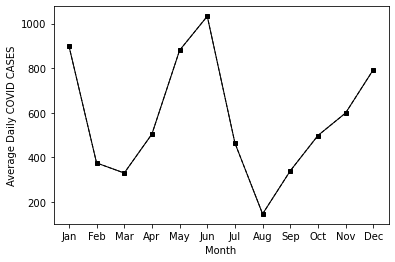

In [102]:
plt.plot( 'month', 'mean', data=statsm, marker='s', color='black', markersize=4,     linewidth=1, linestyle='--')
plt.plot( 'month', 'mean', data=statsm, marker='o', color='black',  markersize=4, linewidth=1,linestyle='-')
plt.xlabel("Month")
plt.ylabel("Average Daily COVID CASES")
plt.show()

We will do the same graph now but only on the year 2021. We will first create the column `year`. It works as follows:
1. We first tell to Python that the `date` column is composed of dates object
2. We can then tell to Python to extract the year from the date

In [103]:
df['date'][0]

'2020-02-24'

In [104]:
df['date'] = pd. to_datetime(df['date'],format='%Y-%m-%d')

In [105]:
df['date'][0]

Timestamp('2020-02-24 00:00:00')

In [106]:
df['year'] = pd. DatetimeIndex(df['date']). year

In [107]:
df['year'][0]

2020

I compute now, by country, by year, by month the following statistics on the daily COVID cases: mean, std, size, CI(95%) LB, and UB.

In [108]:
statsdcases=df.groupby(['country','year','month']).agg({"dcases": [np.mean, np.std, np.size,get_ci_lb,get_ci_ub]})

In [109]:
statsdcases

dcases                                  \
                               mean          std  size    get_ci_lb   
country     year month                                                
Afghanistan 2020 Jan            NaN          NaN   NaN          NaN   
                 Feb       0.833333     2.041241   6.0    -1.308818   
                 Mar       5.258065    10.871883  31.0     1.270225   
                 Apr      55.366667    40.385627  30.0    40.286426   
                 May     430.741935   266.692078  31.0   332.918491   
...                             ...          ...   ...          ...   
Zimbabwe    2021 Aug     513.322581   386.841948  31.0   371.427809   
                 Sep     201.566667   135.119789  30.0   151.112108   
                 Oct      69.580645    58.035492  31.0    48.293055   
                 Nov      54.933333    82.622087  30.0    24.081739   
                 Dec    2536.548387  2572.199964  31.0  1593.057823   

                                     
                          get_ci_ub  
country     year month               
Afghanistan 2020 Jan            NaN  
                 Feb       2.975485  
                 Mar       9.245904  
                 Apr      70.446908  
                 May     528.565379  
...                             ...  
Zimbabwe    2021 Aug     655.217353  
                 Sep     252.021225  
                 Oct      90.868235  
                 Nov      85.784928  
                 Dec    3480.038951  

[4488 rows x 5 columns]

Transform the data index to columns

In [110]:
statsdcases=statsdcases.reset_index()

In [111]:
statsdcases

country  year month       dcases                                  \
                                      mean          std  size    get_ci_lb   
0     Afghanistan  2020   Jan          NaN          NaN   NaN          NaN   
1     Afghanistan  2020   Feb     0.833333     2.041241   6.0    -1.308818   
2     Afghanistan  2020   Mar     5.258065    10.871883  31.0     1.270225   
3     Afghanistan  2020   Apr    55.366667    40.385627  30.0    40.286426   
4     Afghanistan  2020   May   430.741935   266.692078  31.0   332.918491   
...           ...   ...   ...          ...          ...   ...          ...   
4483     Zimbabwe  2021   Aug   513.322581   386.841948  31.0   371.427809   
4484     Zimbabwe  2021   Sep   201.566667   135.119789  30.0   151.112108   
4485     Zimbabwe  2021   Oct    69.580645    58.035492  31.0    48.293055   
4486     Zimbabwe  2021   Nov    54.933333    82.622087  30.0    24.081739   
4487     Zimbabwe  2021   Dec  2536.548387  2572.199964  31.0  1593.057823   

                   
        get_ci_ub  
0             NaN  
1        2.975485  
2        9.245904  
3       70.446908  
4      528.565379  
...           ...  
4483   655.217353  
4484   252.021225  
4485    90.868235  
4486    85.784928  
4487  3480.038951  

[4488 rows x 8 columns]

Filter now the Egypt data on 2021

In [112]:
statsEgy=statsdcases[(statsdcases['country']=='Egypt') & (statsdcases['year']==2021)]

In [113]:
statsEgy

country  year month       dcases                                 \
                                 mean         std  size    get_ci_lb   
1236   Egypt  2021   Jan   899.645161  251.335970  31.0   807.454383   
1237   Egypt  2021   Feb   588.321429   40.989659  28.0   572.427298   
1238   Egypt  2021   Mar   635.709677   36.309038  31.0   622.391415   
1239   Egypt  2021   Apr   847.366667   92.416405  30.0   812.857814   
1240   Egypt  2021   May  1132.193548   55.087457  31.0  1111.987306   
1241   Egypt  2021   Jun   621.066667  197.770841  30.0   547.217821   
1242   Egypt  2021   Jul    96.129032   61.659139  31.0    73.512277   
1243   Egypt  2021   Aug   134.806452   73.635326  31.0   107.796796   
1244   Egypt  2021   Sep   536.100000  151.276488  30.0   479.612431   
1245   Egypt  2021   Oct   854.612903   53.664189  31.0   834.928720   
1246   Egypt  2021   Nov   918.700000  248.217528  30.0   826.014052   
1247   Egypt  2021   Dec   870.870968  212.967093  31.0   792.754007   

                   
        get_ci_ub  
1236   991.835939  
1237   604.215559  
1238   649.027940  
1239   881.875520  
1240  1152.399791  
1241   694.915513  
1242   118.745787  
1243   161.816107  
1244   592.587569  
1245   874.297087  
1246  1011.385948  
1247   948.987928

In [114]:
statsEgy.columns

MultiIndex([('country',          ''),
            (   'year',          ''),
            (  'month',          ''),
            ( 'dcases',      'mean'),
            ( 'dcases',       'std'),
            ( 'dcases',      'size'),
            ( 'dcases', 'get_ci_lb'),
            ( 'dcases', 'get_ci_ub')],
           )

In [115]:
statsEgy.columns=['country','year','month','mean','std','size','lb','ub']

Draw then the average daily COVID cases by month in Egypt. 

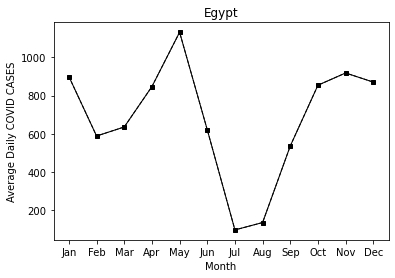

In [116]:
plt.plot( 'month', 'mean', data=statsEgy, marker='s', color='black', markersize=4,     linewidth=1, linestyle='--')
plt.plot( 'month', 'mean', data=statsEgy, marker='o', color='black',  markersize=4, linewidth=1,linestyle='-')
plt.xlabel("Month")
plt.ylabel("Average Daily COVID CASES")
plt.title("Egypt")
plt.show()

In [117]:
ci_lb_ub=[statsEgy['lb'],statsEgy['ub']]

In [118]:
err = np.abs(ci_lb_ub - statsEgy['mean'].to_numpy())

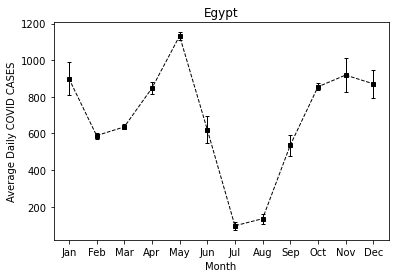

In [119]:
plt.errorbar('month', 'mean',  yerr=err, data=statsEgy,marker='s', capsize=2,
             color='black', markersize=4, linewidth=1, linestyle='--')
plt.xlabel("Month")
plt.ylabel("Average Daily COVID CASES")
plt.title("Egypt")
plt.show()

Let's compare now between 2020 and 2021 

In [120]:
statsEgy21=statsdcases[(statsdcases['country']=='Egypt')
                       & (statsdcases['year']==2021)]
statsEgy21

country  year month       dcases                                 \
                                 mean         std  size    get_ci_lb   
1236   Egypt  2021   Jan   899.645161  251.335970  31.0   807.454383   
1237   Egypt  2021   Feb   588.321429   40.989659  28.0   572.427298   
1238   Egypt  2021   Mar   635.709677   36.309038  31.0   622.391415   
1239   Egypt  2021   Apr   847.366667   92.416405  30.0   812.857814   
1240   Egypt  2021   May  1132.193548   55.087457  31.0  1111.987306   
1241   Egypt  2021   Jun   621.066667  197.770841  30.0   547.217821   
1242   Egypt  2021   Jul    96.129032   61.659139  31.0    73.512277   
1243   Egypt  2021   Aug   134.806452   73.635326  31.0   107.796796   
1244   Egypt  2021   Sep   536.100000  151.276488  30.0   479.612431   
1245   Egypt  2021   Oct   854.612903   53.664189  31.0   834.928720   
1246   Egypt  2021   Nov   918.700000  248.217528  30.0   826.014052   
1247   Egypt  2021   Dec   870.870968  212.967093  31.0   792.754007   

                   
        get_ci_ub  
1236   991.835939  
1237   604.215559  
1238   649.027940  
1239   881.875520  
1240  1152.399791  
1241   694.915513  
1242   118.745787  
1243   161.816107  
1244   592.587569  
1245   874.297087  
1246  1011.385948  
1247   948.987928

In [121]:
statsEgy20=statsdcases[(statsdcases['country']=='Egypt')
                       & (statsdcases['year']==2020)]
statsEgy20

country  year month       dcases                                 \
                                 mean         std  size    get_ci_lb   
1224   Egypt  2020   Jan          NaN         NaN   NaN          NaN   
1225   Egypt  2020   Feb     0.062500    0.250000  16.0    -0.070716   
1226   Egypt  2020   Mar    22.870968   20.228267  31.0    15.451179   
1227   Egypt  2020   Apr   160.900000   54.996144  30.0   140.364102   
1228   Egypt  2020   May   627.354839  330.723908  31.0   506.044330   
1229   Egypt  2020   Jun  1444.200000  176.114853  30.0  1378.437633   
1230   Egypt  2020   Jul   831.193548  326.183427  31.0   711.548501   
1231   Egypt  2020   Aug   156.806452   42.607839  31.0   141.177770   
1232   Egypt  2020   Sep   141.966667   23.389481  30.0   133.232891   
1233   Egypt  2020   Oct   140.548387   24.650678  31.0   131.506445   
1234   Egypt  2020   Nov   278.533333   71.137426  30.0   251.970182   
1235   Egypt  2020   Dec   714.548387  354.179036  31.0   584.634468   

                   
        get_ci_ub  
1224          NaN  
1225     0.195716  
1226    30.290756  
1227   181.435898  
1228   748.665347  
1229  1509.962367  
1230   950.838595  
1231   172.435133  
1232   150.700442  
1233   149.590329  
1234   305.096485  
1235   844.462306

In [122]:
statsEgy20.columns=['country','year','month','mean','std','size','lb','ub']

In [123]:
statsEgy21.columns=['country','year','month','mean','std','size','lb','ub']

In [124]:
x=statsEgy20['month']
x

1224    Jan
1225    Feb
1226    Mar
1227    Apr
1228    May
1229    Jun
1230    Jul
1231    Aug
1232    Sep
1233    Oct
1234    Nov
1235    Dec
Name: month, dtype: category
Categories (12, object): ['Jan' < 'Feb' < 'Mar' < 'Apr' ... 'Sep' < 'Oct' < 'Nov' < 'Dec']

In [125]:
y1=statsEgy20['mean']
y1

1224            NaN
1225       0.062500
1226      22.870968
1227     160.900000
1228     627.354839
1229    1444.200000
1230     831.193548
1231     156.806452
1232     141.966667
1233     140.548387
1234     278.533333
1235     714.548387
Name: mean, dtype: float64

In [126]:
y2=statsEgy21['mean']
y2

1236     899.645161
1237     588.321429
1238     635.709677
1239     847.366667
1240    1132.193548
1241     621.066667
1242      96.129032
1243     134.806452
1244     536.100000
1245     854.612903
1246     918.700000
1247     870.870968
Name: mean, dtype: float64

In [127]:
ci_lb_ub20=[statsEgy20['lb'],statsEgy20['ub']]
err20 = np.abs(ci_lb_ub20 - statsEgy20['mean'].to_numpy())

In [128]:
ci_lb_ub21=[statsEgy21['lb'],statsEgy21['ub']]
err21 = np.abs(ci_lb_ub21 - statsEgy21['mean'].to_numpy())

In [129]:
from matplotlib.transforms import Affine2D

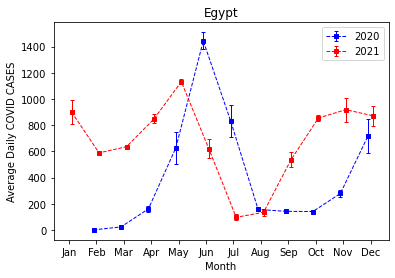

In [130]:
fig, ax = plt.subplots()

trans1 = Affine2D().translate(-0.1, 0.0) + ax.transData
trans2 = Affine2D().translate(+0.1, 0.0) + ax.transData
plt.errorbar('month', 'mean',  yerr=err20, data=statsEgy20,marker='s', capsize=2,
             color='blue', markersize=4, linewidth=1, linestyle='--',transform=trans1)
plt.errorbar('month', 'mean',  yerr=err21, data=statsEgy21,marker='s', capsize=2,
             color='red', markersize=4, linewidth=1, linestyle='--',transform=trans2)
plt.legend(['2020','2021'])
plt.xlabel("Month")
plt.ylabel("Average Daily COVID CASES")
plt.title("Egypt")
plt.show()